In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st 

In [2]:
file_2015 = "UWA-Project/Resources/2015.csv"
file_2016 = "UWA-Project/Resources/2016.csv"
file_2017 = "UWA-Project/Resources/2017.csv"
file_2018 = "UWA-Project/Resources/2018.csv"
file_2019 = "UWA-Project/Resources/2019.csv"

In [3]:
happy_data_2015 = pd.read_csv(file_2015)
happy_data_2015

,Country,Happiness_Rank,Happiness_Score,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,Dystopia_Residual
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,154,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,155,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,156,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,157,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
happy_data_2015["Country"].nunique()

158

In [5]:
happy_data_2015.describe()

,Happiness_Rank,Happiness_Score,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,Dystopia_Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [6]:
# Top 10 in Happiness_Rank_2015 with zero values so we cannot use this
top_10_2015 = happy_data_2015.head(10)
top_10_2015

,Country,Happiness_Rank,Happiness_Score,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,Dystopia_Residual
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,6,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,7,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,8,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,9,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,10,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [7]:
# Retrieve the data per top country in 2015
top_country_2015 = []
gdp_2015 = []
family_2015 = []
health_2015 = []
freedom_2015 = []
trust_2015 = []
generosity_2015 = []
dystopia_2015 = []

factors_2015 = [gdp_2015, family_2015, health_2015, freedom_2015, trust_2015, generosity_2015, dystopia_2015]

for country in top_10_2015["Country"]:
    top_country_2015.append(country)
    
for gdp in top_10_2015["Economy_(GDP_per_Capita)"]:
    gdp_2015.append(gdp)

for family in top_10_2015["Family"]:
    family_2015.append(family)
    
for health in top_10_2015["Health_(Life_Expectancy)"]:
    health_2015.append(health)
    
for freedom in top_10_2015["Freedom"]:
    freedom_2015.append(freedom)
    
for trust in top_10_2015["Trust_(Government_Corruption)"]:
    trust_2015.append(trust)
    
for generosity in top_10_2015["Generosity"]:
    generosity_2015.append(generosity)
        
for dystopia in top_10_2015["Dystopia_Residual"]:
    dystopia_2015.append(dystopia)

In [8]:
# check what is the lowest score
max_2015 = happy_data_2015["Happiness_Rank"].max()
print(f"2015 max rank is: {max_2015}")

2015 max rank is: 158


In [9]:
# Bottom 10 in Happiness_Rank_2015
bottom_10_2015 = happy_data_2015.nlargest(10, ["Happiness_Rank"]).reset_index(drop = True)\
            .sort_values("Happiness_Rank").reset_index(drop = True)
bottom_10_2015

,Country,Happiness_Rank,Happiness_Score,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,Dystopia_Residual
0,Chad,149,3.667,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
1,Guinea,150,3.656,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
2,Ivory Coast,151,3.655,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
3,Burkina Faso,152,3.587,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
4,Afghanistan,153,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
5,Rwanda,154,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
6,Benin,155,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
7,Syria,156,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
8,Burundi,157,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
9,Togo,158,2.839,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [10]:
# Retrieve the data per bottom country in 2015
bottom_country_2015 = []
b_gdp_2015 = []
b_family_2015 = []
b_health_2015 = []
b_freedom_2015 = []
b_trust_2015 = []
b_generosity_2015 = []
b_dystopia_2015 = []

b_factors_2015 = [b_gdp_2015, b_family_2015, b_health_2015, b_freedom_2015, b_trust_2015, b_generosity_2015, b_dystopia_2015]

for country in bottom_10_2015["Country"]:
    bottom_country_2015.append(country)
    
for gdp in bottom_10_2015["Economy_(GDP_per_Capita)"]:
    b_gdp_2015.append(gdp)

for family in bottom_10_2015["Family"]:
    b_family_2015.append(family)
    
for health in bottom_10_2015["Health_(Life_Expectancy)"]:
    b_health_2015.append(health)
    
for freedom in bottom_10_2015["Freedom"]:
    b_freedom_2015.append(freedom)
    
for trust in bottom_10_2015["Trust_(Government_Corruption)"]:
    b_trust_2015.append(trust)
    
for generosity in bottom_10_2015["Generosity"]:
    b_generosity_2015.append(generosity)
        
for dystopia in bottom_10_2015["Dystopia_Residual"]:
    b_dystopia_2015.append(dystopia)


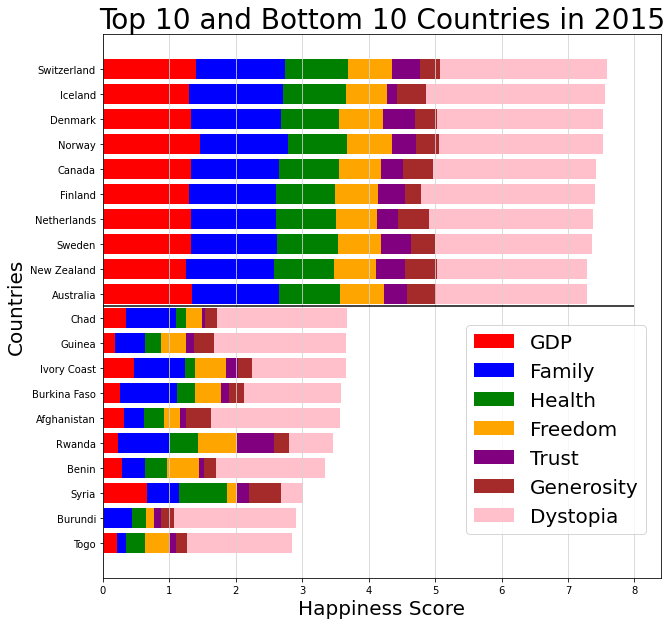

In [11]:
# horizontal bar graph for 2015
fig = plt.figure(figsize = (10, 10))
plt.barh(top_country_2015, factors_2015[0], left = np.sum(factors_2015[:0], axis = 0), color = "red", label = "GDP")
plt.barh(top_country_2015, factors_2015[1], left = np.sum(factors_2015[:1], axis = 0), color = "blue", label = "Family")
plt.barh(top_country_2015, factors_2015[2], left = np.sum(factors_2015[:2], axis = 0), color = "green", label = "Health")
plt.barh(top_country_2015, factors_2015[3], left = np.sum(factors_2015[:3], axis = 0), color = "orange", label = "Freedom")
plt.barh(top_country_2015, factors_2015[4], left = np.sum(factors_2015[:4], axis = 0), color = "purple", label = "Trust")
plt.barh(top_country_2015, factors_2015[5], left = np.sum(factors_2015[:5], axis = 0), color = "brown", label = "Generosity")
plt.barh(top_country_2015, factors_2015[6], left = np.sum(factors_2015[:6], axis = 0), color = "pink", label = "Dystopia")
plt.barh(bottom_country_2015, b_factors_2015[0], left = np.sum(b_factors_2015[:0], axis = 0), color = "red")
plt.barh(bottom_country_2015, b_factors_2015[1], left = np.sum(b_factors_2015[:1], axis = 0), color = "blue")
plt.barh(bottom_country_2015, b_factors_2015[2], left = np.sum(b_factors_2015[:2], axis = 0), color = "green")
plt.barh(bottom_country_2015, b_factors_2015[3], left = np.sum(b_factors_2015[:3], axis = 0), color = "orange")
plt.barh(bottom_country_2015, b_factors_2015[4], left = np.sum(b_factors_2015[:4], axis = 0), color = "purple")
plt.barh(bottom_country_2015, b_factors_2015[5], left = np.sum(b_factors_2015[:5], axis = 0), color = "brown")
plt.barh(bottom_country_2015, b_factors_2015[6], left = np.sum(b_factors_2015[:6], axis = 0), color = "pink")
plt.legend(loc = (.65, .08), prop={'size': 20})
plt.hlines(9.5, 0, 8, color = "black", alpha = 10)
plt.grid (b=True, which="major", axis="x", linestyle="-", color="lightgrey")
plt.gca().invert_yaxis()
plt.title("Top 10 and Bottom 10 Countries in 2015", fontsize= 28)
plt.xlabel("Happiness Score", fontsize= 20)
plt.ylabel("Countries", fontsize= 20)
plt.savefig("graph figures/2015 Top and Bottom Countries.png")
plt.show()

In [12]:
# 2016 data
happy_data_2016 = pd.read_csv(file_2016)
happy_data_2016

,Country,Happiness_Rank,Happiness_Score,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,Dystopia_Residual
0,Denmark,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...
152,Benin,153,3.484,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,154,3.360,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,155,3.303,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,156,3.069,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


In [13]:
happy_data_2016["Country"].nunique()

157

In [14]:
happy_data_2016.describe()

,Happiness_Rank,Happiness_Score,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,Dystopia_Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [15]:
# Top 10 in Happiness_Rank_2016 
top_10_2016 = happy_data_2016.head(10)
top_10_2016

,Country,Happiness_Rank,Happiness_Score,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,Dystopia_Residual
0,Denmark,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
5,Canada,6,7.404,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485
6,Netherlands,7,7.339,1.46468,1.02912,0.81231,0.55211,0.29927,0.47416,2.70749
7,New Zealand,8,7.334,1.36066,1.17278,0.83096,0.58147,0.41904,0.49401,2.47553
8,Australia,9,7.313,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,2.54650
9,Sweden,10,7.291,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2.54734


In [16]:
# check what is the lowest score
max_2016 = happy_data_2016["Happiness_Rank"].max()
print(f"2016 max rank is: {max_2016}")

2016 max rank is: 157


In [17]:
# Bottom 10 in Happiness_Rank_2016
bottom_10_2016 = happy_data_2016.tail(10)
bottom_10_2016

,Country,Happiness_Rank,Happiness_Score,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,Dystopia_Residual
147,Madagascar,148,3.695,0.27954,0.46115,0.37109,0.13684,0.07506,0.22040,2.15075
148,Tanzania,149,3.666,0.47155,0.77623,0.35700,0.31760,0.05099,0.31472,1.37769
149,Liberia,150,3.622,0.10706,0.50353,0.23165,0.25748,0.04852,0.24063,2.23284
150,Guinea,151,3.607,0.22415,0.31090,0.18829,0.30953,0.11920,0.29914,2.15604
151,Rwanda,152,3.515,0.32846,0.61586,0.31865,0.54320,0.50521,0.23552,0.96819
152,Benin,153,3.484,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,154,3.360,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,155,3.303,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,156,3.069,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789
156,Burundi,157,2.905,0.06831,0.23442,0.15747,0.04320,0.09419,0.20290,2.10404


In [18]:
# Retrieve the data per top & bottom country in 2016
top_country_2016 = []
gdp_2016 = []
family_2016 = []
health_2016 = []
freedom_2016 = []
trust_2016 = []
generosity_2016 = []
dystopia_2016 = []

factors_2016 = [gdp_2016, family_2016, health_2016, freedom_2016, trust_2016, generosity_2016, dystopia_2016]

for country in top_10_2016["Country"]:
    top_country_2016.append(country)
    
for gdp in top_10_2016["Economy_(GDP_per_Capita)"]:
    gdp_2016.append(gdp)

for family in top_10_2016["Family"]:
    family_2016.append(family)
    
for health in top_10_2016["Health_(Life_Expectancy)"]:
    health_2016.append(health)
    
for freedom in top_10_2016["Freedom"]:
    freedom_2016.append(freedom)
    
for trust in top_10_2016["Trust_(Government_Corruption)"]:
    trust_2016.append(trust)
    
for generosity in top_10_2016["Generosity"]:
    generosity_2016.append(generosity)
        
for dystopia in top_10_2016["Dystopia_Residual"]:
    dystopia_2016.append(dystopia)
    
    
# Retrieve the data per bottom country in 2016
bottom_country_2016 = []
b_gdp_2016 = []
b_family_2016 = []
b_health_2016 = []
b_freedom_2016 = []
b_trust_2016 = []
b_generosity_2016 = []
b_dystopia_2016 = []

b_factors_2016 = [b_gdp_2016, b_family_2016, b_health_2016, b_freedom_2016, b_trust_2016, b_generosity_2016, b_dystopia_2016]

for country in bottom_10_2016["Country"]:
    bottom_country_2016.append(country)
    
for gdp in bottom_10_2016["Economy_(GDP_per_Capita)"]:
    b_gdp_2016.append(gdp)

for family in bottom_10_2016["Family"]:
    b_family_2016.append(family)
    
for health in bottom_10_2016["Health_(Life_Expectancy)"]:
    b_health_2016.append(health)
    
for freedom in bottom_10_2016["Freedom"]:
    b_freedom_2016.append(freedom)
    
for trust in bottom_10_2016["Trust_(Government_Corruption)"]:
    b_trust_2016.append(trust)
    
for generosity in bottom_10_2016["Generosity"]:
    b_generosity_2016.append(generosity)
        
for dystopia in bottom_10_2016["Dystopia_Residual"]:
    b_dystopia_2016.append(dystopia)

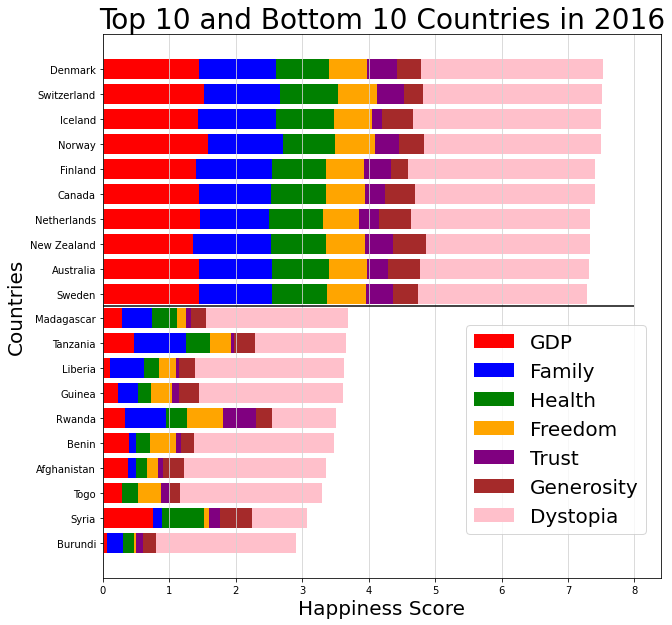

In [19]:
# horizontal bar graph for 2016
fig = plt.figure(figsize = (10, 10))
plt.barh(top_country_2016, factors_2016[0], left = np.sum(factors_2016[:0], axis = 0), color = "red", label = "GDP")
plt.barh(top_country_2016, factors_2016[1], left = np.sum(factors_2016[:1], axis = 0), color = "blue", label = "Family")
plt.barh(top_country_2016, factors_2016[2], left = np.sum(factors_2016[:2], axis = 0), color = "green", label = "Health")
plt.barh(top_country_2016, factors_2016[3], left = np.sum(factors_2016[:3], axis = 0), color = "orange", label = "Freedom")
plt.barh(top_country_2016, factors_2016[4], left = np.sum(factors_2016[:4], axis = 0), color = "purple", label = "Trust")
plt.barh(top_country_2016, factors_2016[5], left = np.sum(factors_2016[:5], axis = 0), color = "brown", label = "Generosity")
plt.barh(top_country_2016, factors_2016[6], left = np.sum(factors_2016[:6], axis = 0), color = "pink", label = "Dystopia")
plt.barh(bottom_country_2016, b_factors_2016[0], left = np.sum(b_factors_2016[:0], axis = 0), color = "red")
plt.barh(bottom_country_2016, b_factors_2016[1], left = np.sum(b_factors_2016[:1], axis = 0), color = "blue")
plt.barh(bottom_country_2016, b_factors_2016[2], left = np.sum(b_factors_2016[:2], axis = 0), color = "green")
plt.barh(bottom_country_2016, b_factors_2016[3], left = np.sum(b_factors_2016[:3], axis = 0), color = "orange")
plt.barh(bottom_country_2016, b_factors_2016[4], left = np.sum(b_factors_2016[:4], axis = 0), color = "purple")
plt.barh(bottom_country_2016, b_factors_2016[5], left = np.sum(b_factors_2016[:5], axis = 0), color = "brown")
plt.barh(bottom_country_2016, b_factors_2016[6], left = np.sum(b_factors_2016[:6], axis = 0), color = "pink")
plt.legend(loc = (.65, .08), prop={'size': 20})
plt.hlines(9.5, 0, 8, color = "black", alpha = 10)
plt.grid (b=True, which="major", axis="x", linestyle="-", color="lightgrey")
plt.gca().invert_yaxis()
plt.title("Top 10 and Bottom 10 Countries in 2016", fontsize= 28)
plt.xlabel("Happiness Score", fontsize= 20)
plt.ylabel("Countries", fontsize= 20)
plt.savefig("graph figures/2016 Top and Bottom Countries.png")
plt.show()

In [20]:
# 2017 data
happy_data_2017 = pd.read_csv(file_2017)
happy_data_2017

,Country,Happiness_Rank,Happiness_Score,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,Dystopia_Residual
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012,2.277027
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280,2.313707
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.153527,0.475540,2.322715
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.367007,0.290549,2.276716
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.382612,0.245483,2.430182
...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.455220,0.252756,0.540061
151,Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.151347,0.493664,1.061574
152,Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.066035,0.354256,0.621130
153,Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.084148,0.204435,1.683024


In [21]:
happy_data_2017.describe()

,Happiness_Rank,Happiness_Score,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,Dystopia_Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,0.984718,1.188898,0.551341,0.408786,0.123120,0.246883,1.850238
std,44.888751,1.131230,0.420793,0.287263,0.237073,0.149997,0.101661,0.134780,0.500028
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,0.663371,1.042635,0.369866,0.303677,0.057271,0.154106,1.591291
50%,78.000000,5.279000,1.064578,1.253918,0.606042,0.437454,0.089848,0.231538,1.832910
75%,116.500000,6.101500,1.318027,1.414316,0.723008,0.516561,0.153296,0.323762,2.144654
max,155.000000,7.537000,1.870766,1.610574,0.949492,0.658249,0.464308,0.838075,3.117485


In [22]:
# Top 10 in Happiness_Rank_2017 
top_10_2017 = happy_data_2017.head(10)
top_10_2017

,Country,Happiness_Rank,Happiness_Score,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,Dystopia_Residual
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012,2.277027
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280,2.313707
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.153527,0.475540,2.322715
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.367007,0.290549,2.276716
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.382612,0.245483,2.430182
5,Netherlands,6,7.377,1.503945,1.428939,0.810696,0.585384,0.282662,0.470490,2.294804
6,Canada,7,7.316,1.479204,1.481349,0.834558,0.611101,0.287372,0.435540,2.187264
7,New Zealand,8,7.314,1.405706,1.548195,0.816760,0.614062,0.382817,0.500005,2.046456
8,Sweden,9,7.284,1.494387,1.478162,0.830875,0.612924,0.384399,0.385399,2.097538
9,Australia,10,7.284,1.484415,1.510042,0.843887,0.601607,0.301184,0.477699,2.065211


In [23]:
# Bottom 10 in Happiness_Rank_2017
bottom_10_2017 = happy_data_2017.tail(10)
bottom_10_2017

,Country,Happiness_Rank,Happiness_Score,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,Dystopia_Residual
145,Yemen,146,3.593,0.591683,0.935382,0.310081,0.249464,0.056767,0.104125,1.345601
146,South Sudan,147,3.591,0.397249,0.601323,0.163486,0.147062,0.116794,0.285671,1.879567
147,Liberia,148,3.533,0.119042,0.872118,0.229918,0.332881,0.038948,0.266550,1.673286
148,Guinea,149,3.507,0.244550,0.791245,0.194129,0.348588,0.110938,0.264815,1.552312
149,Togo,150,3.495,0.305445,0.431883,0.247106,0.380426,0.095665,0.196896,1.837229
150,Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.455220,0.252756,0.540061
151,Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.151347,0.493664,1.061574
152,Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.066035,0.354256,0.621130
153,Burundi,154,2.905,0.091623,0.629794,0.151611,0.059901,0.084148,0.204435,1.683024
154,Central African Republic,155,2.693,0.000000,0.000000,0.018773,0.270842,0.056565,0.280876,2.066005


In [24]:
# Retrieve the data per top & bottom country in 2017
top_country_2017 = []
gdp_2017 = []
family_2017 = []
health_2017 = []
freedom_2017 = []
trust_2017 = []
generosity_2017 = []
dystopia_2017 = []

factors_2017 = [gdp_2017, family_2017, health_2017, freedom_2017, trust_2017, generosity_2017, dystopia_2017]

for country in top_10_2017["Country"]:
    top_country_2017.append(country)
    
for gdp in top_10_2017["Economy_(GDP_per_Capita)"]:
    gdp_2017.append(gdp)

for family in top_10_2017["Family"]:
    family_2017.append(family)
    
for health in top_10_2017["Health_(Life_Expectancy)"]:
    health_2017.append(health)
    
for freedom in top_10_2017["Freedom"]:
    freedom_2017.append(freedom)
    
for trust in top_10_2017["Trust_(Government_Corruption)"]:
    trust_2017.append(trust)
    
for generosity in top_10_2017["Generosity"]:
    generosity_2017.append(generosity)
        
for dystopia in top_10_2017["Dystopia_Residual"]:
    dystopia_2017.append(dystopia)
    
    
# Retrieve the data per bottom country in 2017
bottom_country_2017 = []
b_gdp_2017 = []
b_family_2017 = []
b_health_2017 = []
b_freedom_2017 = []
b_trust_2017 = []
b_generosity_2017 = []
b_dystopia_2017 = []

b_factors_2017 = [b_gdp_2017, b_family_2017, b_health_2017, b_freedom_2017, b_trust_2017, b_generosity_2017, b_dystopia_2017]

for country in bottom_10_2017["Country"]:
    bottom_country_2017.append(country)
    
for gdp in bottom_10_2017["Economy_(GDP_per_Capita)"]:
    b_gdp_2017.append(gdp)

for family in bottom_10_2017["Family"]:
    b_family_2017.append(family)
    
for health in bottom_10_2017["Health_(Life_Expectancy)"]:
    b_health_2017.append(health)
    
for freedom in bottom_10_2017["Freedom"]:
    b_freedom_2017.append(freedom)
    
for trust in bottom_10_2017["Trust_(Government_Corruption)"]:
    b_trust_2017.append(trust)
    
for generosity in bottom_10_2017["Generosity"]:
    b_generosity_2017.append(generosity)
        
for dystopia in bottom_10_2017["Dystopia_Residual"]:
    b_dystopia_2017.append(dystopia)

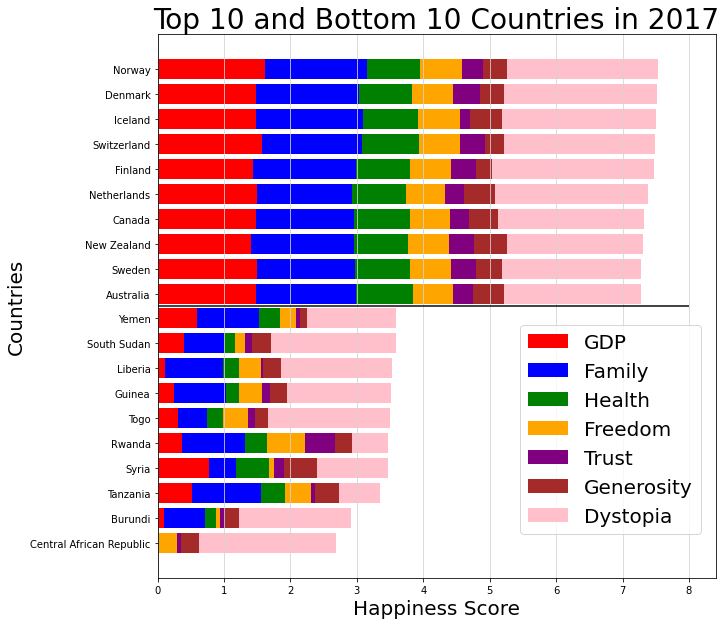

In [25]:
# horizontal bar graph for 2017
fig = plt.figure(figsize = (10, 10))
plt.barh(top_country_2017, factors_2017[0], left = np.sum(factors_2017[:0], axis = 0), color = "red", label = "GDP")
plt.barh(top_country_2017, factors_2017[1], left = np.sum(factors_2017[:1], axis = 0), color = "blue", label = "Family")
plt.barh(top_country_2017, factors_2017[2], left = np.sum(factors_2017[:2], axis = 0), color = "green", label = "Health")
plt.barh(top_country_2017, factors_2017[3], left = np.sum(factors_2017[:3], axis = 0), color = "orange", label = "Freedom")
plt.barh(top_country_2017, factors_2017[4], left = np.sum(factors_2017[:4], axis = 0), color = "purple", label = "Trust")
plt.barh(top_country_2017, factors_2017[5], left = np.sum(factors_2017[:5], axis = 0), color = "brown", label = "Generosity")
plt.barh(top_country_2017, factors_2017[6], left = np.sum(factors_2017[:6], axis = 0), color = "pink", label = "Dystopia")
plt.barh(bottom_country_2017, b_factors_2017[0], left = np.sum(b_factors_2017[:0], axis = 0), color = "red")
plt.barh(bottom_country_2017, b_factors_2017[1], left = np.sum(b_factors_2017[:1], axis = 0), color = "blue")
plt.barh(bottom_country_2017, b_factors_2017[2], left = np.sum(b_factors_2017[:2], axis = 0), color = "green")
plt.barh(bottom_country_2017, b_factors_2017[3], left = np.sum(b_factors_2017[:3], axis = 0), color = "orange")
plt.barh(bottom_country_2017, b_factors_2017[4], left = np.sum(b_factors_2017[:4], axis = 0), color = "purple")
plt.barh(bottom_country_2017, b_factors_2017[5], left = np.sum(b_factors_2017[:5], axis = 0), color = "brown")
plt.barh(bottom_country_2017, b_factors_2017[6], left = np.sum(b_factors_2017[:6], axis = 0), color = "pink")
plt.legend(loc = (.65, .08), prop={'size': 20})
plt.hlines(9.5, 0, 8, color = "black", alpha = 10)
plt.grid (b=True, which="major", axis="x", linestyle="-", color="lightgrey")
plt.gca().invert_yaxis()
plt.title("Top 10 and Bottom 10 Countries in 2017", fontsize= 28)
plt.xlabel("Happiness Score", fontsize= 20)
plt.ylabel("Countries", fontsize= 20)
plt.savefig("graph figures/2017 Top and Bottom Countries.png")
plt.show()

In [26]:
# 2018 data
happy_data_2018 = pd.read_csv(file_2018)
happy_data_2018

,Country,Happiness_Rank,Happiness_Score,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,Dystopia_Residual
0,Finland,1,7.632,1.305,1.592,0.874,0.681,0.393,0.202,2.585
1,Norway,2,7.594,1.456,1.582,0.861,0.686,0.340,0.286,2.383
2,Denmark,3,7.555,1.351,1.590,0.868,0.683,0.408,0.284,2.371
3,Iceland,4,7.495,1.343,1.644,0.914,0.677,0.138,0.353,2.426
4,Switzerland,5,7.487,1.420,1.549,0.927,0.660,0.357,0.256,2.318
...,...,...,...,...,...,...,...,...,...,...
151,Yemen,152,3.355,0.442,1.073,0.343,0.244,0.064,0.083,1.106
152,Tanzania,153,3.303,0.455,0.991,0.381,0.481,0.097,0.270,0.628
153,South Sudan,154,3.254,0.337,0.608,0.177,0.112,0.106,0.224,1.690
154,Central African Republic,155,3.083,0.024,0.000,0.010,0.305,0.038,0.218,2.488


In [27]:
happy_data_2018.describe()

,Happiness_Rank,Happiness_Score,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,Dystopia_Residual
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.111282,0.181006,1.927090
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.096597,0.098471,0.519465
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.291000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.050750,0.109500,1.635250
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.082000,0.174000,1.909000
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.136500,0.239000,2.285750
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.457000,0.598000,2.961000


In [28]:
# Top 10 in Happiness_Rank_2018
top_10_2018 = happy_data_2018.head(10)
top_10_2018

,Country,Happiness_Rank,Happiness_Score,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,Dystopia_Residual
0,Finland,1,7.632,1.305,1.592,0.874,0.681,0.393,0.202,2.585
1,Norway,2,7.594,1.456,1.582,0.861,0.686,0.340,0.286,2.383
2,Denmark,3,7.555,1.351,1.590,0.868,0.683,0.408,0.284,2.371
3,Iceland,4,7.495,1.343,1.644,0.914,0.677,0.138,0.353,2.426
4,Switzerland,5,7.487,1.420,1.549,0.927,0.660,0.357,0.256,2.318
5,Netherlands,6,7.441,1.361,1.488,0.878,0.638,0.295,0.333,2.448
6,Canada,7,7.328,1.330,1.532,0.896,0.653,0.291,0.321,2.305
7,New Zealand,8,7.324,1.268,1.601,0.876,0.669,0.389,0.365,2.156
8,Sweden,9,7.314,1.355,1.501,0.913,0.659,0.383,0.285,2.218
9,Australia,10,7.272,1.340,1.573,0.910,0.647,0.302,0.361,2.139


In [29]:
# Bottom 10 in Happiness_Rank_2018
bottom_10_2018 = happy_data_2018.nlargest(10, ["Happiness_Rank"]).sort_values("Happiness_Rank")\
            .sort_values("Happiness_Rank")
bottom_10_2018

,Country,Happiness_Rank,Happiness_Score,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,Dystopia_Residual
146,Malawi,147,3.587,0.186,0.541,0.306,0.531,0.080,0.210,1.733
147,Haiti,148,3.582,0.315,0.714,0.289,0.025,0.104,0.392,1.743
148,Liberia,149,3.495,0.076,0.858,0.267,0.419,0.030,0.206,1.639
149,Syria,150,3.462,0.689,0.382,0.539,0.088,0.144,0.376,1.244
150,Rwanda,151,3.408,0.332,0.896,0.400,0.636,0.444,0.200,0.500
151,Yemen,152,3.355,0.442,1.073,0.343,0.244,0.064,0.083,1.106
152,Tanzania,153,3.303,0.455,0.991,0.381,0.481,0.097,0.270,0.628
153,South Sudan,154,3.254,0.337,0.608,0.177,0.112,0.106,0.224,1.690
154,Central African Republic,155,3.083,0.024,0.000,0.010,0.305,0.038,0.218,2.488
155,Burundi,156,2.905,0.091,0.627,0.145,0.065,0.076,0.149,1.752


In [30]:
# Retrieve the data per top & bottom country in 2018
top_country_2018 = []
gdp_2018 = []
family_2018 = []
health_2018 = []
freedom_2018 = []
trust_2018 = []
generosity_2018 = []
dystopia_2018 = []

factors_2018 = [gdp_2018, family_2018, health_2018, freedom_2018, trust_2018, generosity_2018, dystopia_2018]

for country in top_10_2018["Country"]:
    top_country_2018.append(country)
    
for gdp in top_10_2018["Economy_(GDP_per_Capita)"]:
    gdp_2018.append(gdp)

for family in top_10_2018["Family"]:
    family_2018.append(family)
    
for health in top_10_2018["Health_(Life_Expectancy)"]:
    health_2018.append(health)
    
for freedom in top_10_2018["Freedom"]:
    freedom_2018.append(freedom)
    
for trust in top_10_2018["Trust_(Government_Corruption)"]:
    trust_2018.append(trust)
    
for generosity in top_10_2018["Generosity"]:
    generosity_2018.append(generosity)
        
for dystopia in top_10_2018["Dystopia_Residual"]:
    dystopia_2018.append(dystopia)
    
    
# Retrieve the data per bottom country in 2018
bottom_country_2018 = []
b_gdp_2018 = []
b_family_2018 = []
b_health_2018 = []
b_freedom_2018 = []
b_trust_2018 = []
b_generosity_2018 = []
b_dystopia_2018 = []

b_factors_2018 = [b_gdp_2018, b_family_2018, b_health_2018, b_freedom_2018, b_trust_2018, b_generosity_2018, b_dystopia_2018]

for country in bottom_10_2018["Country"]:
    bottom_country_2018.append(country)
    
for gdp in bottom_10_2018["Economy_(GDP_per_Capita)"]:
    b_gdp_2018.append(gdp)

for family in bottom_10_2018["Family"]:
    b_family_2018.append(family)
    
for health in bottom_10_2018["Health_(Life_Expectancy)"]:
    b_health_2018.append(health)
    
for freedom in bottom_10_2018["Freedom"]:
    b_freedom_2018.append(freedom)
    
for trust in bottom_10_2018["Trust_(Government_Corruption)"]:
    b_trust_2018.append(trust)
    
for generosity in bottom_10_2018["Generosity"]:
    b_generosity_2018.append(generosity)
        
for dystopia in bottom_10_2018["Dystopia_Residual"]:
    b_dystopia_2018.append(dystopia)

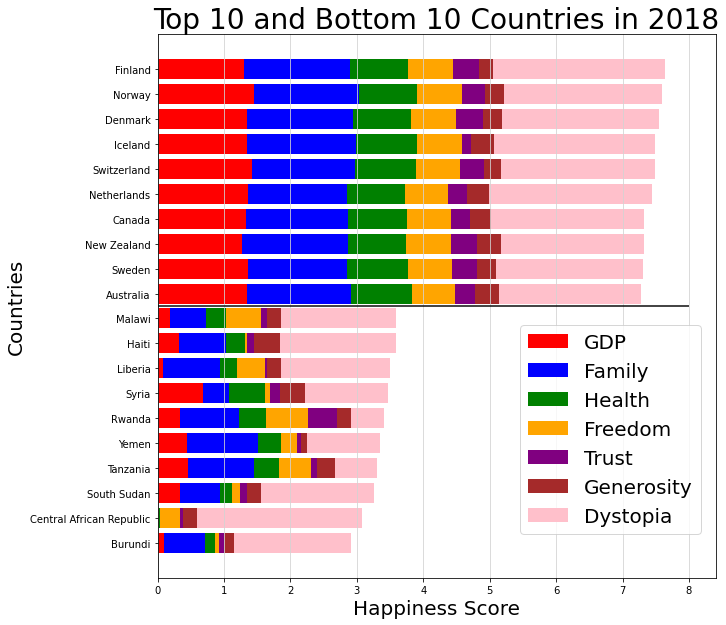

In [31]:
# horizontal bar graph for 2018
fig = plt.figure(figsize = (10, 10))
plt.barh(top_country_2018, factors_2018[0], left = np.sum(factors_2018[:0], axis = 0), color = "red", label = "GDP")
plt.barh(top_country_2018, factors_2018[1], left = np.sum(factors_2018[:1], axis = 0), color = "blue", label = "Family")
plt.barh(top_country_2018, factors_2018[2], left = np.sum(factors_2018[:2], axis = 0), color = "green", label = "Health")
plt.barh(top_country_2018, factors_2018[3], left = np.sum(factors_2018[:3], axis = 0), color = "orange", label = "Freedom")
plt.barh(top_country_2018, factors_2018[4], left = np.sum(factors_2018[:4], axis = 0), color = "purple", label = "Trust")
plt.barh(top_country_2018, factors_2018[5], left = np.sum(factors_2018[:5], axis = 0), color = "brown", label = "Generosity")
plt.barh(top_country_2018, factors_2018[6], left = np.sum(factors_2018[:6], axis = 0), color = "pink", label = "Dystopia")
plt.barh(bottom_country_2018, b_factors_2018[0], left = np.sum(b_factors_2018[:0], axis = 0), color = "red")
plt.barh(bottom_country_2018, b_factors_2018[1], left = np.sum(b_factors_2018[:1], axis = 0), color = "blue")
plt.barh(bottom_country_2018, b_factors_2018[2], left = np.sum(b_factors_2018[:2], axis = 0), color = "green")
plt.barh(bottom_country_2018, b_factors_2018[3], left = np.sum(b_factors_2018[:3], axis = 0), color = "orange")
plt.barh(bottom_country_2018, b_factors_2018[4], left = np.sum(b_factors_2018[:4], axis = 0), color = "purple")
plt.barh(bottom_country_2018, b_factors_2018[5], left = np.sum(b_factors_2018[:5], axis = 0), color = "brown")
plt.barh(bottom_country_2018, b_factors_2018[6], left = np.sum(b_factors_2018[:6], axis = 0), color = "pink")
plt.legend(loc = (.65, .08), prop={'size': 20})
plt.hlines(9.5, 0, 8, color = "black", alpha = 10)
plt.grid (b=True, which="major", axis="x", linestyle="-", color="lightgrey")
plt.gca().invert_yaxis()
plt.title("Top 10 and Bottom 10 Countries in 2018", fontsize= 28)
plt.xlabel("Happiness Score", fontsize= 20)
plt.ylabel("Countries", fontsize= 20)
plt.savefig("graph figures/2018 Top and Bottom Countries.png")
plt.show()

In [32]:
# 2019 data
happy_data_2019 = pd.read_csv(file_2019)
happy_data_2019

,Country,Happiness_Rank,Happiness_Score,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,Dystopia_Residual
0,Finland,1,7.769,1.340,1.587,0.986,0.596,0.393,0.153,2.714
1,Denmark,2,7.600,1.383,1.573,0.996,0.592,0.410,0.252,2.394
2,Norway,3,7.554,1.488,1.582,1.028,0.603,0.341,0.271,2.241
3,Iceland,4,7.494,1.380,1.624,1.026,0.591,0.118,0.354,2.401
4,Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.298,0.322,2.394
...,...,...,...,...,...,...,...,...,...,...
151,Rwanda,152,3.334,0.359,0.711,0.614,0.555,0.411,0.217,0.467
152,Tanzania,153,3.231,0.476,0.885,0.499,0.417,0.147,0.276,0.531
153,Afghanistan,154,3.203,0.350,0.517,0.361,0.000,0.025,0.158,1.792
154,Central African Republic,155,3.083,0.026,0.000,0.105,0.225,0.035,0.235,2.457


In [33]:
happy_data_2019.describe()

,Happiness_Rank,Happiness_Score,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,Dystopia_Residual
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.110603,0.184846,1.879872
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.094538,0.095254,0.528859
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.184000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.047000,0.108750,1.513000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.085500,0.177500,1.916000
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.141250,0.248250,2.267500
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.453000,0.566000,3.050000


In [34]:
# Top 10 in Happiness_Rank_2018
top_10_2019 = happy_data_2019.head(10)
top_10_2019

,Country,Happiness_Rank,Happiness_Score,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,Dystopia_Residual
0,Finland,1,7.769,1.340,1.587,0.986,0.596,0.393,0.153,2.714
1,Denmark,2,7.600,1.383,1.573,0.996,0.592,0.410,0.252,2.394
2,Norway,3,7.554,1.488,1.582,1.028,0.603,0.341,0.271,2.241
3,Iceland,4,7.494,1.380,1.624,1.026,0.591,0.118,0.354,2.401
4,Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.298,0.322,2.394
5,Switzerland,6,7.480,1.452,1.526,1.052,0.572,0.343,0.263,2.272
6,Sweden,7,7.343,1.387,1.487,1.009,0.574,0.373,0.267,2.246
7,New Zealand,8,7.307,1.303,1.557,1.026,0.585,0.380,0.330,2.126
8,Canada,9,7.278,1.365,1.505,1.039,0.584,0.308,0.285,2.192
9,Austria,10,7.246,1.376,1.475,1.016,0.532,0.226,0.244,2.377


In [35]:
# Bottom 10 in Happiness_Rank_2019
bottom_10_2019 = happy_data_2019.tail(10)
bottom_10_2019

,Country,Happiness_Rank,Happiness_Score,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,Dystopia_Residual
146,Haiti,147,3.597,0.323,0.688,0.449,0.026,0.110,0.419,1.582
147,Botswana,148,3.488,1.041,1.145,0.538,0.455,0.100,0.025,0.184
148,Syria,149,3.462,0.619,0.378,0.440,0.013,0.141,0.331,1.540
149,Malawi,150,3.410,0.191,0.560,0.495,0.443,0.089,0.218,1.414
150,Yemen,151,3.380,0.287,1.163,0.463,0.143,0.077,0.108,1.139
151,Rwanda,152,3.334,0.359,0.711,0.614,0.555,0.411,0.217,0.467
152,Tanzania,153,3.231,0.476,0.885,0.499,0.417,0.147,0.276,0.531
153,Afghanistan,154,3.203,0.350,0.517,0.361,0.000,0.025,0.158,1.792
154,Central African Republic,155,3.083,0.026,0.000,0.105,0.225,0.035,0.235,2.457
155,South Sudan,156,2.853,0.306,0.575,0.295,0.010,0.091,0.202,1.374


In [36]:
# Retrieve the data per top & bottom country in 2018
top_country_2019 = []
gdp_2019 = []
family_2019 = []
health_2019 = []
freedom_2019 = []
trust_2019 = []
generosity_2019 = []
dystopia_2019 = []

factors_2019 = [gdp_2019, family_2019, health_2019, freedom_2019, trust_2019, generosity_2019, dystopia_2019]

for country in top_10_2019["Country"]:
    top_country_2019.append(country)
    
for gdp in top_10_2019["Economy_(GDP_per_Capita)"]:
    gdp_2019.append(gdp)

for family in top_10_2019["Family"]:
    family_2019.append(family)
    
for health in top_10_2019["Health_(Life_Expectancy)"]:
    health_2019.append(health)
    
for freedom in top_10_2019["Freedom"]:
    freedom_2019.append(freedom)
    
for trust in top_10_2019["Trust_(Government_Corruption)"]:
    trust_2019.append(trust)
    
for generosity in top_10_2019["Generosity"]:
    generosity_2019.append(generosity)
        
for dystopia in top_10_2019["Dystopia_Residual"]:
    dystopia_2019.append(dystopia)
    
    
# Retrieve the data per bottom country in 2018
bottom_country_2019 = []
b_gdp_2019 = []
b_family_2019 = []
b_health_2019 = []
b_freedom_2019 = []
b_trust_2019 = []
b_generosity_2019 = []
b_dystopia_2019 = []

b_factors_2019 = [b_gdp_2019, b_family_2019, b_health_2019, b_freedom_2019, b_trust_2019, b_generosity_2019, b_dystopia_2019]

for country in bottom_10_2019["Country"]:
    bottom_country_2019.append(country)
    
for gdp in bottom_10_2019["Economy_(GDP_per_Capita)"]:
    b_gdp_2019.append(gdp)

for family in bottom_10_2019["Family"]:
    b_family_2019.append(family)
    
for health in bottom_10_2019["Health_(Life_Expectancy)"]:
    b_health_2019.append(health)
    
for freedom in bottom_10_2019["Freedom"]:
    b_freedom_2019.append(freedom)
    
for trust in bottom_10_2019["Trust_(Government_Corruption)"]:
    b_trust_2019.append(trust)
    
for generosity in bottom_10_2019["Generosity"]:
    b_generosity_2019.append(generosity)
        
for dystopia in bottom_10_2019["Dystopia_Residual"]:
    b_dystopia_2019.append(dystopia)

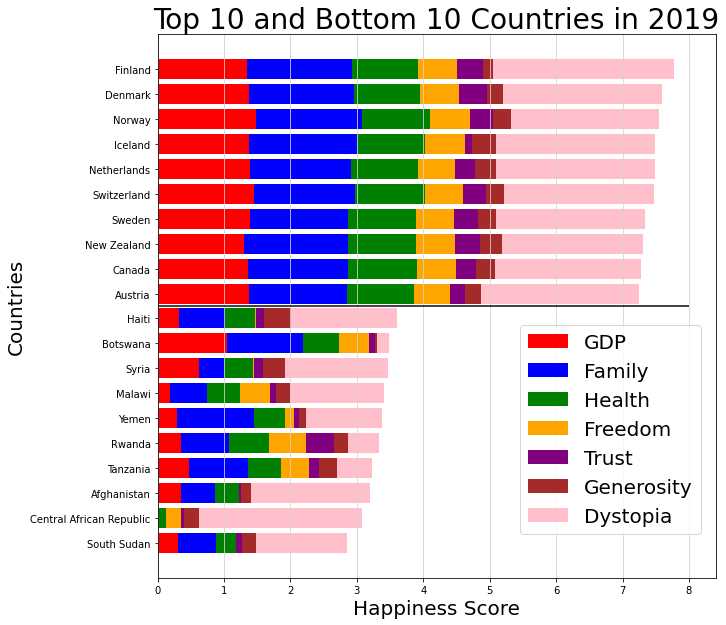

In [37]:
# horizontal bar graph for 2018
fig = plt.figure(figsize = (10, 10))
plt.barh(top_country_2019, factors_2019[0], left = np.sum(factors_2019[:0], axis = 0), color = "red", label = "GDP")
plt.barh(top_country_2019, factors_2019[1], left = np.sum(factors_2019[:1], axis = 0), color = "blue", label = "Family")
plt.barh(top_country_2019, factors_2019[2], left = np.sum(factors_2019[:2], axis = 0), color = "green", label = "Health")
plt.barh(top_country_2019, factors_2019[3], left = np.sum(factors_2019[:3], axis = 0), color = "orange", label = "Freedom")
plt.barh(top_country_2019, factors_2019[4], left = np.sum(factors_2019[:4], axis = 0), color = "purple", label = "Trust")
plt.barh(top_country_2019, factors_2019[5], left = np.sum(factors_2019[:5], axis = 0), color = "brown", label = "Generosity")
plt.barh(top_country_2019, factors_2019[6], left = np.sum(factors_2019[:6], axis = 0), color = "pink", label = "Dystopia")
plt.barh(bottom_country_2019, b_factors_2019[0], left = np.sum(b_factors_2019[:0], axis = 0), color = "red")
plt.barh(bottom_country_2019, b_factors_2019[1], left = np.sum(b_factors_2019[:1], axis = 0), color = "blue")
plt.barh(bottom_country_2019, b_factors_2019[2], left = np.sum(b_factors_2019[:2], axis = 0), color = "green")
plt.barh(bottom_country_2019, b_factors_2019[3], left = np.sum(b_factors_2019[:3], axis = 0), color = "orange")
plt.barh(bottom_country_2019, b_factors_2019[4], left = np.sum(b_factors_2019[:4], axis = 0), color = "purple")
plt.barh(bottom_country_2019, b_factors_2019[5], left = np.sum(b_factors_2019[:5], axis = 0), color = "brown")
plt.barh(bottom_country_2019, b_factors_2019[6], left = np.sum(b_factors_2019[:6], axis = 0), color = "pink")
plt.legend(loc = (.65, .08), prop={'size': 20})
plt.hlines(9.5, 0, 8, color = "black", alpha = 10)
plt.grid (b=True, which="major", axis="x", linestyle="-", color="lightgrey")
plt.gca().invert_yaxis()
plt.title("Top 10 and Bottom 10 Countries in 2019", fontsize= 28)
plt.xlabel("Happiness Score", fontsize= 20)
plt.ylabel("Countries", fontsize= 20)
plt.savefig("graph figures/2019 Top and Bottom Countries.png")
plt.show()

# Scatter plot and Predictions

In [38]:
# Get the top eleven including Australia in # 11
top_eleven_2019 = happy_data_2019.head(11)
top_eleven_2019

,Country,Happiness_Rank,Happiness_Score,Economy_(GDP_per_Capita),Family,Health_(Life_Expectancy),Freedom,Trust_(Government_Corruption),Generosity,Dystopia_Residual
0,Finland,1,7.769,1.340,1.587,0.986,0.596,0.393,0.153,2.714
1,Denmark,2,7.600,1.383,1.573,0.996,0.592,0.410,0.252,2.394
2,Norway,3,7.554,1.488,1.582,1.028,0.603,0.341,0.271,2.241
3,Iceland,4,7.494,1.380,1.624,1.026,0.591,0.118,0.354,2.401
4,Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.298,0.322,2.394
5,Switzerland,6,7.480,1.452,1.526,1.052,0.572,0.343,0.263,2.272
6,Sweden,7,7.343,1.387,1.487,1.009,0.574,0.373,0.267,2.246
7,New Zealand,8,7.307,1.303,1.557,1.026,0.585,0.380,0.330,2.126
8,Canada,9,7.278,1.365,1.505,1.039,0.584,0.308,0.285,2.192
9,Austria,10,7.246,1.376,1.475,1.016,0.532,0.226,0.244,2.377


In [39]:
# Create a List and store the Australia scores and Top 10 minimum scores of each year
year_count = [2015, 2016, 2017, 2018, 2019]
au_scores = []
min_happ_score = []

au_scores.append(top_10_2015.iloc[9, 2])
au_scores.append(top_10_2016.iloc[8, 2])
au_scores.append(top_10_2017.iloc[9, 2])
au_scores.append(top_10_2018.iloc[9, 2])
au_scores.append(top_eleven_2019.iloc[10, 2])

min_happ_score.append(top_10_2015["Happiness_Score"].min())
min_happ_score.append(top_10_2016["Happiness_Score"].min())
min_happ_score.append(top_10_2017["Happiness_Score"].min())
min_happ_score.append(top_10_2018["Happiness_Score"].min())
min_happ_score.append(top_10_2019["Happiness_Score"].min())

print(year_count)
print(au_scores)
print(min_happ_score)

[2015, 2016, 2017, 2018, 2019]
[7.284, 7.313, 7.28399991989136, 7.272, 7.228]
[7.284, 7.291, 7.28399991989136, 7.272, 7.246]


In [40]:
# Create a DataFrame for the Australia scores and Top 10 minimum scores of each year
au_pd = pd.DataFrame({"Year": year_count,
                     "AU_Happiness_Score": au_scores,
                     "Top_10_score": min_happ_score})
au_pd

,Year,AU_Happiness_Score,Top_10_score
0,2015,7.284,7.284
1,2016,7.313,7.291
2,2017,7.284,7.284
3,2018,7.272,7.272
4,2019,7.228,7.246


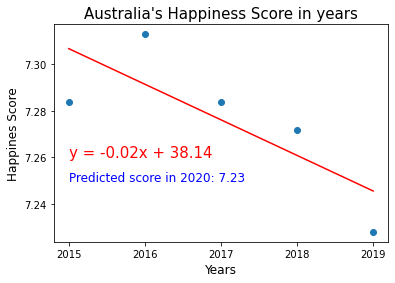

In [41]:
# Australia linear equation & prediction score in 2020
x_values = au_pd["Year"]
y_values = au_pd["AU_Happiness_Score"]
au_2020 = 2020
plt.scatter(x_values, y_values)
plt.xticks(year_count)
slope, intercept, r_value, p_value, std_err = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
au_predicted_score = round(slope * au_2020 + intercept,2)
plt.annotate(line_eq,(2015, 7.26),fontsize=15,color="red")  
plt.annotate(f"Predicted score in 2020: {au_predicted_score}", (2015, 7.25), fontsize=12, color="blue")
plt.xlabel("Years", fontsize = 12)
plt.ylabel("Happines Score", fontsize = 12)
plt.title("Australia's Happiness Score in years", fontsize = 15)
plt.show()

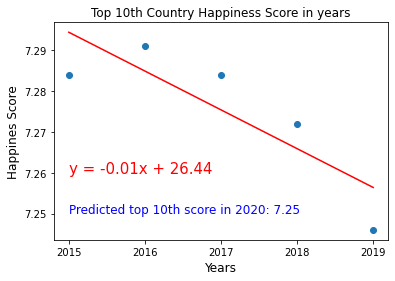

In [42]:
# Top 10 minimum score linear equation & prediction score in 2020
x_values = au_pd["Year"]
y_values = au_pd["Top_10_score"]
top_10_2020 = 2020
plt.scatter(x_values, y_values)
plt.xticks(year_count)
slope, intercept, r_value, p_value, std_err = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
top_10_predicted_score = round(slope * top_10_2020 + intercept,2)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(2015, 7.26),fontsize=15,color="red")
plt.annotate(f"Predicted top 10th score in 2020: {top_10_predicted_score}", (2015, 7.25), fontsize=12, color="blue")
plt.xlabel("Years", fontsize = 12)
plt.ylabel("Happines Score", fontsize = 12)
plt.title("Top 10th Country Happiness Score in years")
plt.show()